# Exercícios: Análise e manipulação de dados

In [1]:
import os

import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()

## Parte 1: Dados de utilizadores de cartões de crédito

Carregue o conjunto de dados [Credit Card Customers](https://www.kaggle.com/sakshigoyal7/credit-card-customers), guardado no ficheiro Excel definido pela variável `xlxs_file_path`, para uma tabela de dados da biblioteca [Pandas](https://pandas.pydata.org/).

In [2]:
data_path = '../data/' if os.path.exists('../data/') else 'https://raw.githubusercontent.com/TheAwesomeGe/DECD/main/data/'
xlsx_file_path = data_path + 'BankChurners.xlsx'

In [3]:
print(xlsx_file_path)

../data/BankChurners.xlsx


Realize as seguintes etapas de pré-processamento de dados:

1. Verifique que a importação foi bem sucedida e analise as primeiras entradas do conjunto de dados.

In [4]:
bank_df = pd.read_excel(xlsx_file_path)

bank_df.columns = [col.lower() for col in bank_df.columns]
print(bank_df.head(5))

   customer_age  dependent_count education_level marital_status  \
0            45                3     High School        Married   
1            49                5        Graduate         Single   
2            51                3        Graduate        Married   
3            40                4     High School        Unknown   
4            40                3      Uneducated        Married   

  income_category card_category  months_on_book  total_relationship_count  \
0     $60K - $80K          Blue              39                         5   
1  Less than $40K          Blue              44                         6   
2    $80K - $120K          Blue              36                         4   
3  Less than $40K          Blue              34                         3   
4     $60K - $80K          Blue              21                         5   

   months_inactive_12_mon  contacts_count_12_mon  ...  total_revolving_bal  \
0                       1                      3  ...   

2. Remova os seguintes atributos:
    * o número de cliente (uma vez que os identificadores locais não são informação útil para tarefas de descoberta de padrões)
    * as características discriminatórias de género, por forma a que os resultados não sejam enviesados por estes atributos (o que seria pouco ético e, de certa forma, ilegal segundo a lei portuguesa)

In [5]:
bank_df.drop(columns=['clientnum', 'gender'], inplace=True)

3. Defina como categóricos os seguintes atributos: `Education_Level`, `Marital_Status`, `Income_Category`, `Card_Category` e `Attrition_Flag`.

In [6]:
print(bank_df.info())

bank_df['education_level'] = bank_df['education_level'].astype('category')
bank_df['marital_status'] = bank_df['marital_status'].astype('category')
bank_df['income_category'] = bank_df['income_category'].astype('category')
bank_df['card_category'] = bank_df['card_category'].astype('category')
bank_df['attrition_flag'] = bank_df['attrition_flag'].astype('category')

print(bank_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_age              10127 non-null  int64  
 1   dependent_count           10127 non-null  int64  
 2   education_level           10127 non-null  object 
 3   marital_status            10127 non-null  object 
 4   income_category           10127 non-null  object 
 5   card_category             10127 non-null  object 
 6   months_on_book            10127 non-null  int64  
 7   total_relationship_count  10127 non-null  int64  
 8   months_inactive_12_mon    10127 non-null  int64  
 9   contacts_count_12_mon     10127 non-null  int64  
 10  credit_limit              10127 non-null  float64
 11  total_revolving_bal       10127 non-null  int64  
 12  avg_open_to_buy           10127 non-null  float64
 13  total_amt_chng_q4_q1      10127 non-null  float64
 14  total_

4. Defina o atributo `Attrition_Flag` como *target*, criando um dicionário que mapeia um inteiro diferente para cada um dos valores possíveis deste atributo.

In [7]:
def flag_function(x):
    if x.lower() == 'existing customer':
        return 1
    elif x.lower() == 'attrited customer':
        return 0
    else:
        return 'Unknown'

# Opção lenta
#bank_df['attrition_flag'] = [flag_function(x) for x in bank_df['attrition_flag']]

print(bank_df['attrition_flag'].isnull().sum())
# Opção mais rápida
bank_df['attrition_flag'] = bank_df['attrition_flag'].apply(flag_function)
bank_df.head(5)


0


,customer_age,dependent_count,education_level,marital_status,income_category,card_category,months_on_book,total_relationship_count,months_inactive_12_mon,contacts_count_12_mon,credit_limit,total_revolving_bal,avg_open_to_buy,total_amt_chng_q4_q1,total_trans_amt,total_trans_ct,total_ct_chng_q4_q1,avg_utilization_ratio,attrition_flag
0,45,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,1
1,49,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,1
2,51,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,1
3,40,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,1
4,40,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,1


5. Guarde uma cópia dos dados num ficheiro Excel com o nome *credito.xlsx*.

In [8]:
bank_df.to_excel('../data/credito.xlsx')

6. Identifique os atributos que têm valores em falta. (**Nota**: Neste conjunto de dados, os valores em falta são representados pelo valor `'Unknown'`. Comece por aplicar o método `replace('Unknown', np.nan)` sobre a tabela de dados.)

In [9]:
#unknown_counts = {}
#for column in bank_df.columns:
#    unknown_counts[column] = (bank_df[column] == 'Unknown').sum()

#print(unknown_counts)
bank_df.replace('Unknown', np.nan, inplace=True)

print(bank_df.isna().sum())



customer_age                   0
dependent_count                0
education_level             1519
marital_status               749
income_category             1112
card_category                  0
months_on_book                 0
total_relationship_count       0
months_inactive_12_mon         0
contacts_count_12_mon          0
credit_limit                   0
total_revolving_bal            0
avg_open_to_buy                0
total_amt_chng_q4_q1           0
total_trans_amt                0
total_trans_ct                 0
total_ct_chng_q4_q1            0
avg_utilization_ratio          0
attrition_flag                 0
dtype: int64


/var/folders/9n/6m45fxg142j6jt4fdyf75vdm0000gn/T/ipykernel_67470/414775021.py:6: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  bank_df.replace('Unknown', np.nan, inplace=True)


7. Utilize imputação para preencher os valores em falta do nível de educação com um valor representativo.  

In [10]:
import numpy as np

# Replace 'Unknown' values with NaN
bank_df.replace('Unknown', np.nan, inplace=True)

# Find the mode of the education_level column
education_level_mode = bank_df['education_level'].mode()[0]

# Display the mode
print("Mode of education_level:", education_level_mode)

# Count NaN values before filling
print("NaN count before filling:", bank_df['education_level'].isna().sum())

# Fill NaN values with the mode using the recommended approach
bank_df['education_level'] = bank_df['education_level'].fillna(education_level_mode)

# Count NaN values after filling
print("NaN count after filling:", bank_df['education_level'].isna().sum())

# Display unique values in the education_level column
print("Unique values in education_level:", bank_df['education_level'].unique())



Mode of education_level: Graduate
NaN count before filling: 1519
NaN count after filling: 0
Unique values in education_level: ['High School', 'Graduate', 'Uneducated', 'College', 'Post-Graduate', 'Doctorate']
Categories (6, object): ['College', 'Doctorate', 'Graduate', 'High School', 'Post-Graduate', 'Uneducated']


8. Descarte as restantes observações com valores em falta.

In [11]:
print(bank_df.isnull().sum())
bank_df.dropna(inplace=True)
print(bank_df.isnull().sum())

customer_age                   0
dependent_count                0
education_level                0
marital_status               749
income_category             1112
card_category                  0
months_on_book                 0
total_relationship_count       0
months_inactive_12_mon         0
contacts_count_12_mon          0
credit_limit                   0
total_revolving_bal            0
avg_open_to_buy                0
total_amt_chng_q4_q1           0
total_trans_amt                0
total_trans_ct                 0
total_ct_chng_q4_q1            0
avg_utilization_ratio          0
attrition_flag                 0
dtype: int64
customer_age                0
dependent_count             0
education_level             0
marital_status              0
income_category             0
card_category               0
months_on_book              0
total_relationship_count    0
months_inactive_12_mon      0
contacts_count_12_mon       0
credit_limit                0
total_revolving_bal         0


9. Binarize o atributo categórico `Attrition_Flag`.

In [15]:
bin_values, index = pd.factorize(bank_df['attrition_flag'])
bank_df['attrition_flag'] = bin_values
bank_df['attrition_flag'].unique()

array([0, 1])

10. Calcule as correlações entre os atributos numéricos do conjunto de dados e visualize-as usando um mapa de calor.

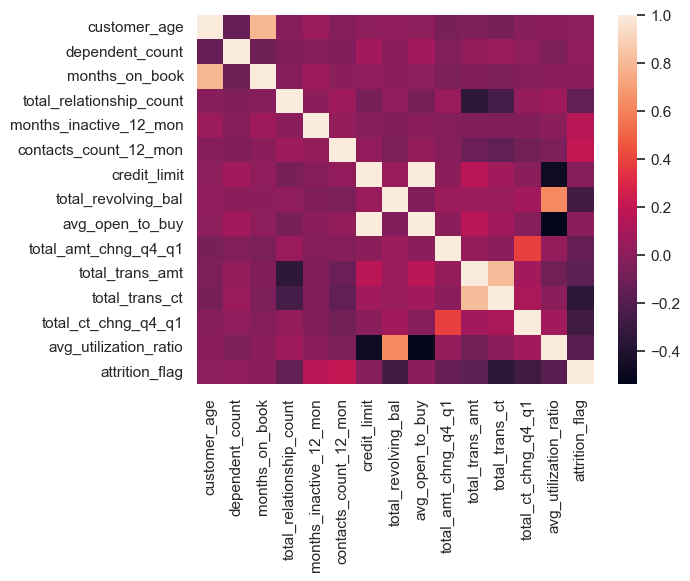

In [17]:
%matplotlib inline
import matplotlib.pyplot as plt

import seaborn as sns
sns.set_theme()  # set the chart style

sns.heatmap(bank_df.corr(numeric_only=True));


11. Visualize como se relacionam os dois atributos a correlação mais alta.

In [25]:
# Compute the correlation matrix
correlation_matrix = bank_df.corr(numeric_only=True)

print(correlation_matrix)

# Extract the upper triangle of the correlation matrix (excluding diagonal)
upper_triangle = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(np.bool_))

# Find pairs with the highest correlation coefficients
max_corr_pairs = upper_triangle.unstack().sort_values(ascending=False).drop_duplicates()

# Print the pairs with the highest correlation coefficients
print("Pairs with the highest correlation coefficients:")
#print(max_corr_pairs.head())

# You can also specify the number of pairs you want to print, for example:
print(max_corr_pairs.head(10))  # Print the top 10 pairs


                          customer_age  dependent_count  months_on_book  \
customer_age                  1.000000        -0.124560        0.790641   
dependent_count              -0.124560         1.000000       -0.107459   
months_on_book                0.790641        -0.107459        1.000000   
total_relationship_count     -0.014478        -0.044804       -0.011493   
months_inactive_12_mon        0.056986        -0.015857        0.072900   
contacts_count_12_mon        -0.019676        -0.041560       -0.009504   
credit_limit                  0.014021         0.082283        0.014979   
total_revolving_bal           0.015541        -0.005639        0.008244   
avg_open_to_buy               0.012632         0.082790        0.014242   
total_amt_chng_q4_q1         -0.067528        -0.028145       -0.056738   
total_trans_amt              -0.047924         0.026698       -0.037614   
total_trans_ct               -0.070402         0.054652       -0.050793   
total_ct_chng_q4_q1      

9. Verifique se os atributos `Credit_Limit` e `Dependent_count` têm *outliers*. Em caso afirmativo, conte-os. (**Sugestão**: [How To Find Outliers in Data Using Python (and How To Handle Them)](https://careerfoundry.com/en/blog/data-analytics/how-to-find-outliers/#how-to-find-outliers))

## Parte 2 - Desempenho académico

Carregue o conjunto de dados [Students' Academic Performance Dataset](https://www.kaggle.com/datasets/aljarah/xAPI-Edu-Data), guardado no ficheiro CSV definido pela variável `csv_file_path` e faça uma análise semelhante à realizada com o conjunto de dados sobre clientes de cartões de crédito.

In [ ]:
csv_file_path = data_path + 'xAPI-Edu-Data.csv'